# AM 205 - Assignment 1
## By Jonathan Guillotte-Blouin

In [2]:
import numpy as np
import numpy.linalg as la
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt

### Question 1: Polynomial approximation of the gamma function

We have the following points:

| n   | 1 | 2 | 3 | 4 |  5 |
|-----|:-:|---|:-:|---|:--:|
| $\tau(n)$ | 1 | 1 | 2 | 6 | 24 |

#### a) Write the interpolant of $\tau(n)$ as $g(x) = \sum_{k=0}^4g_kx^k$

We first want to find the coefficients

$$g_0 = 1 \frac{(x - 2)(x - 3)(x - 4)(x-5)}{(1 - 2)(1 - 3)(1 - 4)(1 - 5)} = \frac{(x - 2)(x - 3)(x - 4)(x-5)}{24}$$

$$g_1 = 1 \frac{(x - 1)(x - 3)(x - 4)(x-5)}{(2 - 1)(2 - 3)(2 - 4)(2 - 5)} = -\frac{(x - 1)(x - 3)(x - 4)(x-5)}{6}$$

$$g_2 = 2 \frac{(x - 1)(x - 2)(x - 4)(x-5)}{(3 - 1)(3 - 2)(3 - 4)(3 - 5)} = \frac{(x - 1)(x - 2)(x - 4)(x-5)}{2}$$

$$g_3 = 6 \frac{(x - 1)(x - 2)(x - 3)(x-5)}{(4 - 1)(4 - 2)(4 - 3)(4 - 5)} = -(x - 1)(x - 2)(x - 3)(x-5)$$

$$g_4 = 24 \frac{(x - 1)(x - 2)(x - 3)(x - 4)}{(5 - 1)(5 - 2)(5 - 3)(5 - 4)} = (x - 1)(x - 2)(x - 3)(x - 4)$$

Our interpolant therefore is

$$g(x) = \frac{(x - 2)(x - 3)(x - 4)(x-5)}{24} - \frac{(x - 1)(x - 3)(x - 4)(x-5)}{6} + \frac{(x - 1)(x - 2)(x - 4)(x-5)}{2} - (x - 1)(x - 2)(x - 3)(x-5) + (x - 1)(x - 2)(x - 3)(x - 4)$$

In [3]:
def g(x):
    g0 = (x - 2)*(x - 3)*(x - 4)*(x - 5)/24
    g1 = -(x - 1)*(x - 3)*(x - 4)*(x - 5)/6
    g2 = (x - 1)*(x - 2)*(x - 4)*(x - 5)/2
    g3 = -(x - 1)*(x - 2)*(x - 3)*(x - 5)
    g4 = (x - 1)*(x - 2)*(x - 3)*(x - 4)
    
    return g0 + g1 + g2 + g3 + g4

print("Let's try our interpolant with the five given data points")
for x in range (1, 6):
    print("g({}) = {}".format(x, g(x)))

Let's try our interpolant with the five given data points
g(1) = 1.0
g(2) = 1.0
g(3) = 2.0
g(4) = 6.0
g(5) = 24.0


#### b) Approximate on $(n, log(\tau(n))$ for n=1,2,3,4,5 called $p(x)$. Then, define the approximation $h(x) = exp(p(x))$.

$$p_0 = ln(1) \frac{(x - 2)(x - 3)(x - 4)(x-5)}{(1 - 2)(1 - 3)(1 - 4)(1 - 5)} = 0$$

$$p_1 = ln(1) \frac{(x - 1)(x - 3)(x - 4)(x-5)}{(2 - 1)(2 - 3)(2 - 4)(2 - 5)} = 0$$

$$p_2 = ln(2) \frac{(x - 1)(x - 2)(x - 4)(x-5)}{(3 - 1)(3 - 2)(3 - 4)(3 - 5)} = ln(2)\frac{(x - 1)(x - 2)(x - 4)(x-5)}{4}$$

$$p_3 = ln(6) \frac{(x - 1)(x - 2)(x - 3)(x-5)}{(4 - 1)(4 - 2)(4 - 3)(4 - 5)} = -ln(6)\frac{(x - 1)(x - 2)(x - 3)(x-5)}{6}$$

$$p_4 = ln(24) \frac{(x - 1)(x - 2)(x - 3)(x - 4)}{(5 - 1)(5 - 2)(5 - 3)(5 - 4)} = ln(24)\frac{(x - 1)(x - 2)(x - 3)(x - 4)}{24}$$

Our interpolant therefore is

$$p(x) = ln(2)\frac{(x - 1)(x - 2)(x - 4)(x-5)}{4} - ln(6)\frac{(x - 1)(x - 2)(x - 3)(x-5)}{6} + ln(24)\frac{(x - 1)(x - 2)(x - 3)(x - 4)}{24}$$

We can define $h(x) = e^{p(x)}$, so we get

$$h(x) = e^{ln(2)\frac{(x - 1)(x - 2)(x - 4)(x-5)}{4} - ln(6)\frac{(x - 1)(x - 2)(x - 3)(x-5)}{6} + ln(24)\frac{(x - 1)(x - 2)(x - 3)(x - 4)}{24}}$$

If we stick with this complex form of $h(x)$, we might get some error (the implementation is called `h`). If we simplify this, however...

$$h(x) = e^{ln(2)\frac{(x - 1)(x - 2)(x - 4)(x-5)}{4}} e^{-ln(6)\frac{(x - 1)(x - 2)(x - 3)(x-5)}{6}} e^{ln(24)\frac{(x - 1)(x - 2)(x - 3)(x - 4)}{24}}$$

$$h(x) = 2^{\frac{(x - 1)(x - 2)(x - 4)(x-5)}{4}} 6^{-\frac{(x - 1)(x - 2)(x - 3)(x-5)}{6}} 24^{\frac{(x - 1)(x - 2)(x - 3)(x - 4)}{24}}$$

This last simplified form is what we call `h_good`, as there is no error when computing the given data points.

In [4]:
def p(x):
    p2 = np.log(2) * (x - 1)*(x - 2)*(x - 4)*(x - 5) / 4
    p3 = -np.log(6) * (x - 1)*(x - 2)*(x - 3)*(x - 5) / 6
    p4 = np.log(24) * (x - 1)*(x - 2)*(x - 3)*(x - 4) / 24
    
    return p2 + p3 + p4

def h(x):
    return np.exp(p(x))
    
def h_good(x):
    h2 = 2 ** ((x - 1)*(x - 2)*(x - 4)*(x - 5)/4)
    h3 = 6 ** (-(x - 1)*(x - 2)*(x - 3)*(x - 5)/6)
    h4 = 24 ** ((x - 1)*(x - 2)*(x - 3)*(x - 4)/24)
    
    return h2 * h3 * h4

print("Let's try our interpolant with the five given data points")
for x in range (1, 6):
    print("h({}) = {}".format(x, h(x)))
    print("h_good({}) = {}".format(x, h_good(x)))

Let's try our interpolant with the five given data points
h(1) = 1.0
h_good(1) = 1.0
h(2) = 1.0
h_good(2) = 1.0
h(3) = 2.0
h_good(3) = 2.0
h(4) = 6.000000000000001
h_good(4) = 6.0
h(5) = 24.000000000000004
h_good(5) = 24.0


#### c) Plot $\tau(x)$, $g(x)$, and $h(x)$ on the interval $1 \leq x \leq 5$.

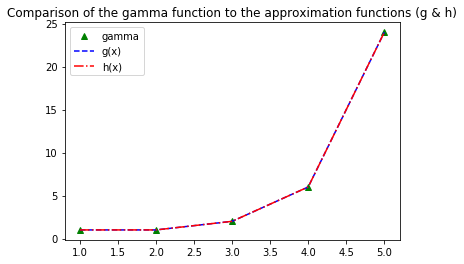

In [9]:
from scipy.special import gamma

domain = [1,2,3,4,5]
gammaValues = [gamma(x) for x in domain]
gValues = [g(x) for x in domain]
hValues = [h(x) for x in domain]

plt.title("Comparison of the gamma function to the approximation functions (g & h)")

# normal distribution overlay
plt.plot(domain, gammaValues, 'g^', domain, gValues, 'b--', domain, hValues, 'r-.');
plt.legend(["gamma", "g(x)", "h(x)"]);

### Question 3: The condition number of a matrix

#### a) Find two 2 x 2 invertible matrices B and C such that $\kappa(B + C) < \kappa(B) + \kappa(C)$.

In [26]:
# helper function to calculate kappa
def kappa(A):
    invA = la.inv(A)
    return la.norm(A) * la.norm(invA)

B1 = np.matrix([[1,2],[3,4]])
C1 = np.matrix([[5,6],[7,8]])
print("B: {}\nC: {}\nk(B) + k(C): {}\nk(B+C) = {}\nTherefore, k(B + C) < k(B) + k(C)".format(B1, C1, kappa(B1) + kappa(C1), kappa(B1+C1)))

B: [[1 2]
 [3 4]]
C: [[5 6]
 [7 8]]
k(B) + k(C): 102.00000000000004
k(B+C) = 42.999999999999986
Therefore, k(B + C) < k(B) + k(C)


#### b) Find two 2 x 2 invertible matrices B and C such that $\kappa(B + C) > \kappa(B) + \kappa(C)$.

In [29]:
while True:
    B2 = np.random.rand(2,2)
    C2 = np.random.rand(2,2)
    
    # B or C is a singular matrix, start over
    if la.det(B2) == 0 or la.det(C2) == 0:
        continue
        
    kappaB = kappa(B2)
    kappaC = kappa(C2)
    kappaBC = kappa(B2 + C2)
    
    # our valid kappas don't satisfy the condition of question b), start over
    if kappaBC <= kappaB + kappaC:
        continue
        
    # we've made it here, our kappas satisfy the condition of question b). print the result and stop
    print("B: {}\nC: {}\nk(B) + k(C): {}\nk(B+C) = {}\nTherefore, k(B + C) > k(B) + k(C)".format(B2, C2, kappaB + kappaC, kappaBC))
    break

B: [[0.44276891 0.61197261]
 [0.75210289 0.40432533]]
C: [[0.85500081 0.0963679 ]
 [0.73602907 0.23405646]]
k(B) + k(C): 14.969137750654804
k(B+C) = 21.30916306194573
Therefore, k(B + C) > k(B) + k(C)


#### c) Suppose that *A* is a symmetric invertible 2 x 2 matrix. Find $\kappa(2A)$ and $\kappa(A^2)$ in terms of  $\kappa(A)$.

In [55]:
dummySymmetric1 = np.matrix([[1,2],[2,1]])
print("k(A1): {}".format(kappa(dummySymmetric1)))
print("k(2 * A1): {}".format(kappa(2*dummySymmetric1)))
print("k(A1^2): {}\n".format(kappa(dummySymmetric1 ** 2)))

dummySymmetric2 = np.matrix([[np.random.rand(), 0], [0, np.random.rand()]])
print("k(A2): {}".format(kappa(dummySymmetric2)))
print("k(2 * A2): {}".format(kappa(2*dummySymmetric2)))
print("k(A2^2): {}\n".format(kappa(dummySymmetric2 ** 2)))

# for i in range(0, 1000000):
#     M = np.random.rand(2,2)
#     kappaM = kappa(M)
#     kappa2M = kappa(2*M)
    
#     if kappaM != kappa2M:
#         print(M)
#         print("k(M): {}".format(kappaM))
#         print("k(2 * M): {}".format(kappa2M))
#         break
# print("nope")

k(A1): 3.333333333333334
k(2 * A1): 3.333333333333334
k(A1^2): 9.111111111111112

k(A2): 2.9301095119371876
k(2 * A2): 2.9301095119371876
k(A2^2): 6.585541751944782



With this experiment, we can get an intuition that:
*  $\kappa(2A) = \kappa(A)$
*  $\kappa(A) < \kappa(A^2) < (\kappa(A))^2$

Let's analyze this more formally.

In [42]:
3.333333333333334 ** 2

11.111111111111114